In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax

In [2]:
rawDfCPU = pd.read_csv('sar_mpgu_izh.csv', skiprows=57064, sep='\s+', skipinitialspace=True, nrows=(61355-57065), engine='python')
rawDfCPU.head()

,09:20:06,DEV,tps,rd_sec/s,wr_sec/s,avgrq-sz,avgqu-sz,await,svctm,%util
0,09:21:06,dev8-32,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
1,09:21:06,dev8-48,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
2,09:21:06,dev253-0,4.94,0.0,125.73,25.46,0.01,1.39,0.29,0.14
3,09:21:06,dev253-1,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
4,09:21:06,dev253-2,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00


In [3]:
time = rawDfCPU.iloc[:,0]
time = pd.to_datetime(time).apply(lambda t: t.strftime('%H:%M'))
y = rawDfCPU.iloc[:, -1].astype(float)
print(y)

0       0.00
1       0.00
2       0.14
3       0.00
4       0.00
        ... 
4285    0.00
4286    0.00
4287    0.00
4288    0.00
4289    0.00
Name: %util, Length: 4290, dtype: float64


In [4]:
dfCPU = pd.DataFrame({'Time': time, 'DEV': rawDfCPU.iloc[:,1], '%util': y})
dfCPU = dfCPU[dfCPU['%util'] != 0]
dfCPU.head(10)

,Time,DEV,%util
2,09:21,dev253-0,0.14
5,09:21,dev253-3,0.14
6,09:21,dev253-4,0.13
8,09:21,dev253-6,0.02
9,09:21,dev8-0,0.04
10,09:21,dev8-16,0.04
24,09:22,dev253-0,0.14
27,09:22,dev253-3,0.14
28,09:22,dev253-4,0.13
30,09:22,dev253-6,0.01


In [5]:
dev_names = set(dfCPU['DEV'])
print(dev_names)

{'dev8-0', 'dev253-4', 'dev253-3', 'dev253-6', 'dev253-0', 'dev8-16'}


In [6]:
dfCPU1 = dfCPU[dfCPU['DEV'] == 'dev253-4']
dfCPU2 = dfCPU[dfCPU['DEV'] == 'dev253-3']
dfCPU3 = dfCPU[dfCPU['DEV'] == 'dev253-6']
dfCPU4 = dfCPU[dfCPU['DEV'] == 'dev253-0']
dfCPU5 = dfCPU[dfCPU['DEV'] == 'dev8-0']
dfCPU6 = dfCPU[dfCPU['DEV'] == 'dev8-16']
dfCPU3.head(20)

,Time,DEV,%util
8,09:21,dev253-6,0.02
30,09:22,dev253-6,0.01
52,09:23,dev253-6,0.01
74,09:24,dev253-6,0.01
96,09:25,dev253-6,0.01
118,09:26,dev253-6,1.32
140,09:27,dev253-6,0.01
162,09:28,dev253-6,0.01
184,09:29,dev253-6,0.01
206,09:30,dev253-6,0.01


In [7]:
dfCPU1.reset_index(inplace=True, drop=True)
dfCPU2.reset_index(inplace=True, drop=True)
dfCPU3.reset_index(inplace=True, drop=True)
dfCPU4.reset_index(inplace=True, drop=True)
dfCPU5.reset_index(inplace=True, drop=True)
dfCPU6.reset_index(inplace=True, drop=True)

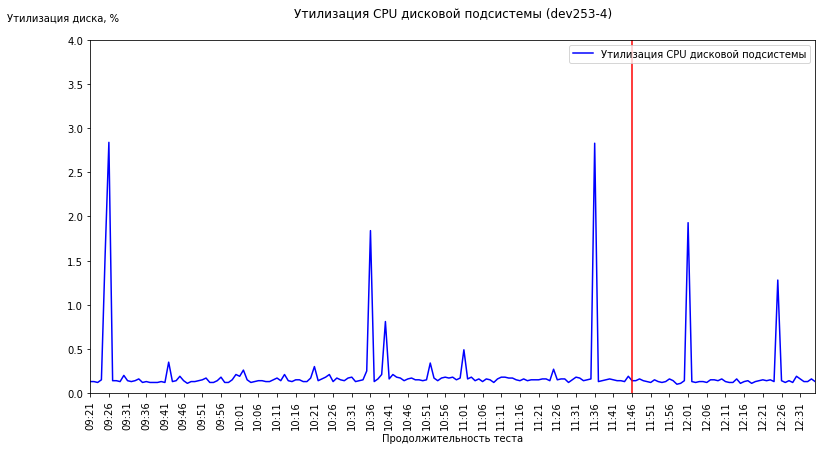

In [8]:
# График для dev253-4
fig, ax = plt.subplots(figsize=(12.992, 6.496))
ax.plot(dfCPU1.Time, dfCPU1['%util'], 'b',label='Утилизация CPU дисковой подсистемы')
plt.axvline(x='11:46', color='r')
ax.set_xlabel('Продолжительность теста')
ax.set_ylabel('Утилизация диска, %', rotation=0, y=1.05)
ax.set_title('Утилизация CPU дисковой подсистемы (dev253-4)', y=1.05)
ax.legend(loc=1)
ax.tick_params(axis='x', labelrotation=90)
ax.set_ylim(0,4)

xAxis = np.arange(0, dfCPU1.index[-1],5)
plt.xlim(dfCPU1['Time'][0], dfCPU1['Time'][dfCPU1.index[-1]])
plt.xticks(xAxis, dfCPU1['Time'][xAxis], rotation='vertical')

plt.savefig('Утилизация CPU дисковой подсистемы_1')
plt.show()
plt.close()

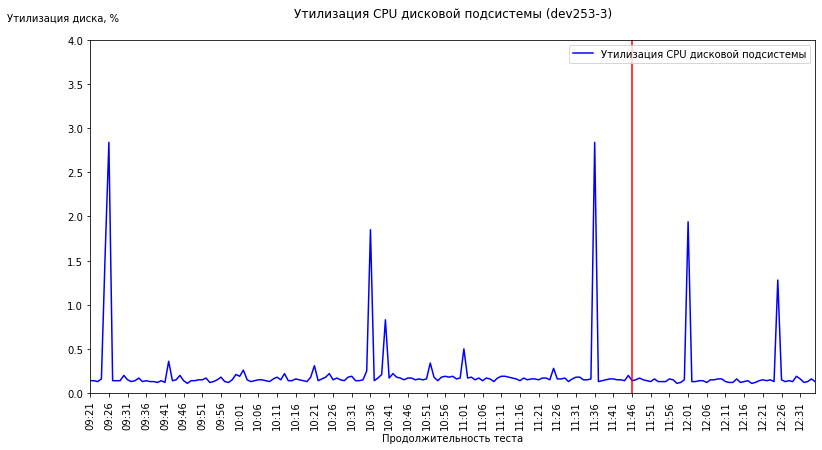

In [9]:
# График для dev253-3
fig, ax = plt.subplots(figsize=(12.992, 6.496))
ax.plot(dfCPU2.Time, dfCPU2['%util'], 'b',label='Утилизация CPU дисковой подсистемы')
plt.axvline(x='11:46', color='r')
ax.set_xlabel('Продолжительность теста')
ax.set_ylabel('Утилизация диска, %', rotation=0, y=1.05)
ax.set_title('Утилизация CPU дисковой подсистемы (dev253-3)', y=1.05)
ax.legend(loc=1)
ax.tick_params(axis='x', labelrotation=90)
ax.set_ylim(0,4)

xAxis = np.arange(0, dfCPU2.index[-1],5)
plt.xlim(dfCPU2['Time'][0], dfCPU2['Time'][dfCPU2.index[-1]])
plt.xticks(xAxis, dfCPU2['Time'][xAxis], rotation='vertical')

plt.savefig('Утилизация CPU дисковой подсистемы_2')
plt.show()
plt.close()

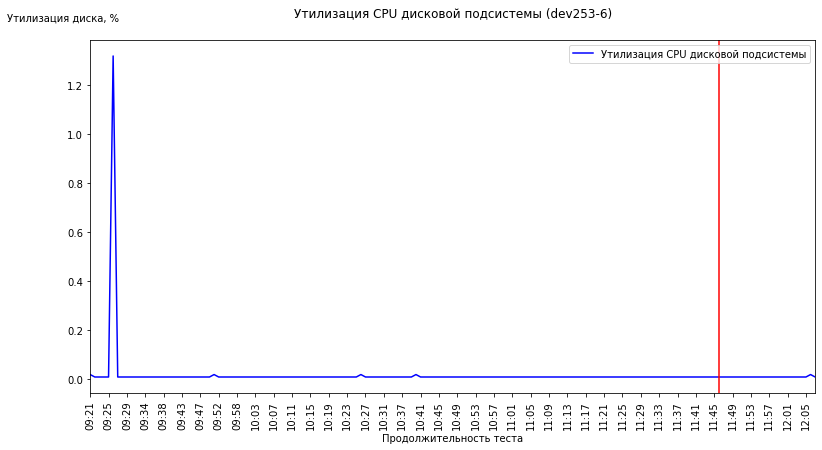

In [10]:
# График для dev253-6
fig, ax = plt.subplots(figsize=(12.992, 6.496))
ax.plot(dfCPU3.Time, dfCPU3['%util'], 'b',label='Утилизация CPU дисковой подсистемы')
plt.axvline(x='11:46', color='r')
ax.set_xlabel('Продолжительность теста')
ax.set_ylabel('Утилизация диска, %', rotation=0, y=1.05)
ax.set_title('Утилизация CPU дисковой подсистемы (dev253-6)', y=1.05)
ax.legend(loc=1)
ax.tick_params(axis='x', labelrotation=90)
# ax.set_ylim(0,4)

xAxis = np.arange(0, 160, 4)
plt.xlim(dfCPU3['Time'][0], dfCPU3['Time'][dfCPU3.index[-1]])
plt.xticks(xAxis, dfCPU3['Time'][xAxis], rotation='vertical')

plt.savefig('Утилизация CPU дисковой подсистемы_3')
plt.show()
plt.close()

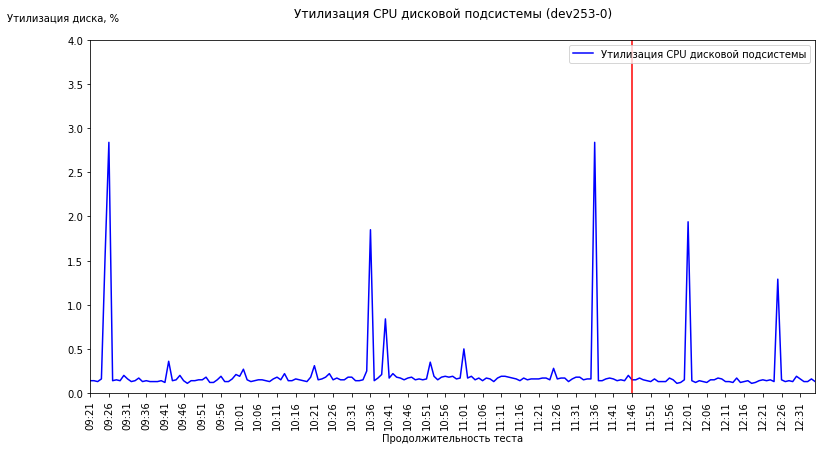

In [11]:
# График для dev253-0
fig, ax = plt.subplots(figsize=(12.992, 6.496))
ax.plot(dfCPU4.Time, dfCPU4['%util'], 'b',label='Утилизация CPU дисковой подсистемы')
plt.axvline(x='11:46', color='r')
ax.set_xlabel('Продолжительность теста')
ax.set_ylabel('Утилизация диска, %', rotation=0, y=1.05)
ax.set_title('Утилизация CPU дисковой подсистемы (dev253-0)', y=1.05)
ax.legend(loc=1)
ax.tick_params(axis='x', labelrotation=90)
ax.set_ylim(0,4)

xAxis = np.arange(0, dfCPU4.index[-1],5)
plt.xlim(dfCPU4['Time'][0], dfCPU4['Time'][dfCPU4.index[-1]])
plt.xticks(xAxis, dfCPU4['Time'][xAxis], rotation='vertical')

plt.savefig('Утилизация CPU дисковой подсистемы_4')
plt.show()
plt.close()

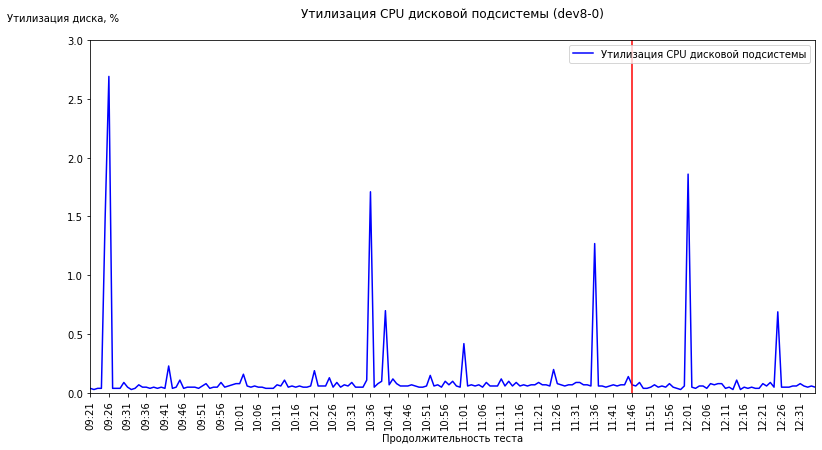

In [12]:
# График для dev8-0
fig, ax = plt.subplots(figsize=(12.992, 6.496))
ax.plot(dfCPU5.Time, dfCPU5['%util'], 'b',label='Утилизация CPU дисковой подсистемы')
plt.axvline(x='11:46', color='r')
ax.set_xlabel('Продолжительность теста')
ax.set_ylabel('Утилизация диска, %', rotation=0, y=1.05)
ax.set_title('Утилизация CPU дисковой подсистемы (dev8-0)', y=1.05)
ax.legend(loc=1)
ax.tick_params(axis='x', labelrotation=90)
ax.set_ylim(0,3)

xAxis = np.arange(0, dfCPU5.index[-1],5)
plt.xlim(dfCPU5['Time'][0], dfCPU5['Time'][dfCPU5.index[-1]])
plt.xticks(xAxis, dfCPU5['Time'][xAxis], rotation='vertical')

plt.savefig('Утилизация CPU дисковой подсистемы_5')
plt.show()
plt.close()

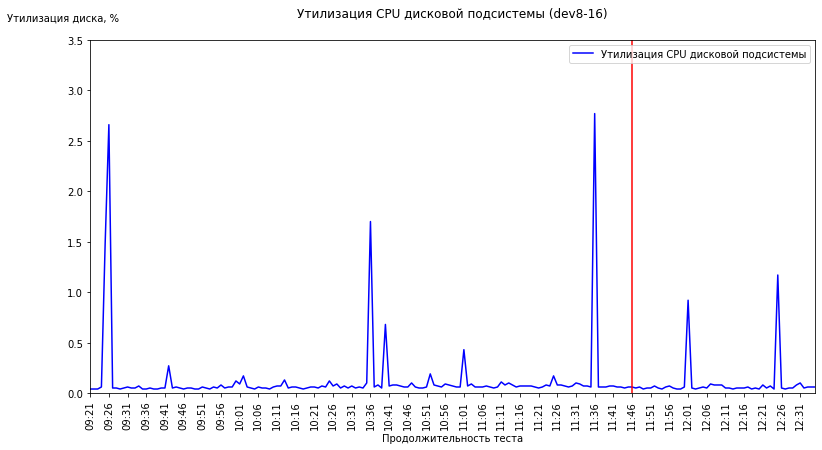

In [13]:
# График для dev8-16
fig, ax = plt.subplots(figsize=(12.992, 6.496))
ax.plot(dfCPU6.Time, dfCPU6['%util'], 'b',label='Утилизация CPU дисковой подсистемы')
plt.axvline(x='11:46', color='r')
ax.set_xlabel('Продолжительность теста')
ax.set_ylabel('Утилизация диска, %', rotation=0, y=1.05)
ax.set_title('Утилизация CPU дисковой подсистемы (dev8-16)', y=1.05)
ax.legend(loc=1)
ax.tick_params(axis='x', labelrotation=90)
ax.set_ylim(0,3.5)

xAxis = np.arange(0, dfCPU6.index[-1],5)
plt.xlim(dfCPU6['Time'][0], dfCPU6['Time'][dfCPU6.index[-1]])
plt.xticks(xAxis, dfCPU6['Time'][xAxis], rotation='vertical')

plt.savefig('Утилизация CPU дисковой подсистемы_6')
plt.show()
plt.close()